In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns
from dtw import accelerated_dtw

%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = (10, 6)

In [49]:
# 读入日收益率数据
data = pd.read_csv('data/daily_return_hs300.csv', dtype={'ticker': str}, parse_dates=['tradeDate'])
# 将日线涨跌幅放大100倍，目的是避免计算时间序列距离时得到的结果太小
data['dailyReturnNoReinv'] = data['dailyReturnNoReinv'] * 100

print(data.shape)
data.head(10)

(604420, 3)


,ticker,tradeDate,dailyReturnNoReinv
0,000001,2008-01-02,-1.6063
1,000001,2008-01-03,-1.6588
2,000001,2008-01-04,2.7309
3,000001,2008-01-07,2.0849
4,000001,2008-01-08,3.1146
5,000001,2008-01-09,1.7826
6,000001,2008-01-10,2.0432
7,000001,2008-01-11,5.0774
8,000001,2008-01-14,-1.4293
9,000001,2008-01-15,-3.2682


In [50]:
# 获取作为模板的时间序列
target_pattern = data[data.ticker=='000001'].set_index('tradeDate').loc['2017-08-14': '2017-11-06'].dailyReturnNoReinv.values
target_pattern

array([ 1.996 ,  0.8806,  0.2909,  0.7736,  0.1919,  0.1915,  1.8164,
        2.3474,  0.2752,  1.6468,  2.1602,  2.8193, -2.0566, -1.3124,
       -0.6206,  4.5495, -0.6826,  0.5154, -2.2223,  0.437 , -0.9574,
        1.4059, -0.9533, -0.9624, -0.2651, -0.3543, -1.0667,  1.4375,
        1.5057, -0.1746, -1.3112, -2.1258, -1.086 , -0.4575,  2.1139,
        1.7101,  1.5044,  0.5231,  0.1734, -1.6451,  2.0246, -0.6903,
        1.5638, -0.5133, -1.2898, -2.5262,  1.7873, -1.0536, -0.7986,
        3.3989,  0.    , -0.1731, -1.2132,  1.228 , -1.2999, -0.9658])

In [51]:
# 计算模板长度
len(target_pattern)

56

In [52]:
# 从data数据中剔除000001的相关数据
data = data[data.ticker != '000001']
data.head()
data.shape

(601929, 3)

In [58]:
# 选取一只股票的数据作为范例
stock_sample = data.loc[data.ticker == '000002'].copy()
stock_sample.head()

,ticker,tradeDate,dailyReturnNoReinv
2491,000002,2008-01-02,1.2135
2492,000002,2008-01-03,-2.3981
2493,000002,2008-01-04,2.6325
2494,000002,2008-01-07,3.2147
2495,000002,2008-01-08,-0.9941


In [60]:
# 定义两点间距离计算函数
dis_abs = lambda x, y: np.abs(x - y).sum()

In [61]:
# 定义函数比较两个时间序列的相似性
def compare_ts(x, y, cmp_fun):
    d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(x, y, dist=cmp_fun)
    return d

In [63]:
# 计算时间序列相似度
%time d_score = stock_sample.dailyReturnNoReinv.rolling(60, min_periods=30).apply(compare_ts, args=(target_pattern, dis_abs), raw=True)

Wall time: 55.3 s


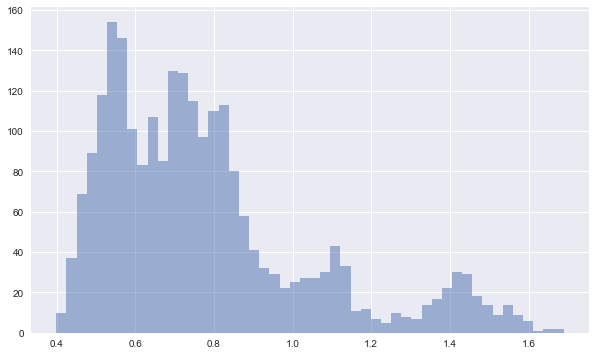

In [32]:
# 观察相似度得分的频率分布直方图
d_score.hist(bins=50, alpha=0.5)

In [12]:
# 讲相似度得分合并到stock_sample数据表
stock_sample['d_score'] = d_score
stock_sample.sort_values('d_score')

,ticker,tradeDate,dailyReturnNoReinv,d_score
3384,000002,2011-09-09,-0.2470,0.399384
3383,000002,2011-09-08,-0.2464,0.410123
3385,000002,2011-09-13,-0.1238,0.411080
4600,000002,2017-04-26,-0.9246,0.414235
4615,000002,2017-05-18,-0.5225,0.418878
4602,000002,2017-04-28,-1.3158,0.419409
4614,000002,2017-05-17,-0.4681,0.422192
4603,000002,2017-05-02,-1.5385,0.422306
4604,000002,2017-05-03,-1.7709,0.423859
4617,000002,2017-05-22,-0.5217,0.424210


In [13]:
# 计算开仓信号
stock_sample['open_signal'] = np.where(stock_sample.d_score< 0.5, 1, 0)
stock_sample

,ticker,tradeDate,dailyReturnNoReinv,d_score,open_signal
2491,000002,2008-01-02,1.2135,NaN,0
2492,000002,2008-01-03,-2.3981,NaN,0
2493,000002,2008-01-04,2.6325,NaN,0
2494,000002,2008-01-07,3.2147,NaN,0
2495,000002,2008-01-08,-0.9941,NaN,0
2496,000002,2008-01-09,1.0040,NaN,0
2497,000002,2008-01-10,1.2259,NaN,0
2498,000002,2008-01-11,1.6693,NaN,0
2499,000002,2008-01-14,0.5473,NaN,0
2500,000002,2008-01-15,-3.1381,NaN,0


In [35]:
# 检查数据
# stock_sample.to_csv('test.csv')

In [8]:
def get_holding_signal(df):
    """
    根据开仓信号和日收益率数据计算使用跟踪止损条件下的持仓信号
    params df: 包含开仓信号和日收益率数据的DataFrame
    return: 返回持仓信号构成的Series，索引结构与df相同
    """
    holding_flag = False
    trade_net_value = 1
    max_net_value = 1
    holding_signal = []
    for idx, row in df.iterrows():
        if holding_flag:                                          # 持仓的情况下，检查平仓信号
            trade_net_value *= (row.dailyReturnNoReinv/100 + 1)   # 持仓的情况下记录单笔交易的净值
            max_net_value = max(max_net_value, trade_net_value)   # 记录单笔交易中出现过的最大净值
            trade_drawdown = trade_net_value / max_net_value      # 计算最大回撤幅度
            holding_signal.append(1)
            if trade_drawdown < 0.95:                             # 回撤超过5%的情况下平仓，平仓时要将所有存储中间过程的变量重置
                holding_flag = False
                trade_net_value = 1
                max_net_value = 1
        else:                                                     # 不持仓的情况下，检查开仓信号
            holding_signal.append(0)
            if row.open_signal == 1:                              # 出现开仓信号的条件下，修改持仓标记，则下个循环里会进入持仓的逻辑分支
                holding_flag = True
    return pd.Series(holding_signal, index=df.index)
            

In [15]:
# 计算持仓标记
%time stock_sample['holding_signal'] = get_holding_signal(stock_sample)

Wall time: 218 ms


In [16]:
# 计算净值
stock_sample['net_value'] = (stock_sample.dailyReturnNoReinv / 100 * stock_sample.holding_signal + 1).cumprod()

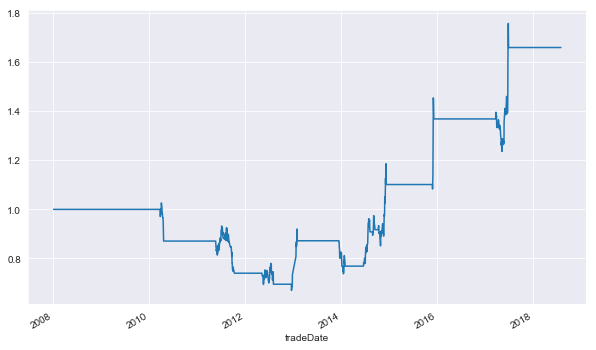

In [23]:
# 生成净值曲线
stock_sample.set_index('tradeDate').net_value.plot(figsize=(10,6))

In [55]:
# stock_sample.to_csv('test.csv')

### 2.3. 投资组合构建

In [1]:
import multiprocessing
from sklearn.externals.joblib import Parallel, delayed

In [2]:
# 获取机器CPU数量
n_cores = multiprocessing.cpu_count()
n_cores

1

In [101]:
# 计算所有股票的匹配得分
stock_groups = data.groupby('ticker', group_keys=False, sort=False)

In [102]:
def process_single_stock(df):
    return df.dailyReturnNoReinv.rolling(60, min_periods=30).apply(compare_ts, args=(target_pattern, dis_abs), raw=True)

In [103]:
# 使用并行运算对groupby对象进行计算，返回结果为每个股票代码对应的DataFrame所组成的列表
%time retLst = Parallel(n_jobs=n_cores)(delayed(process_single_stock)(stock) for name, stock in stock_groups)

Wall time: 1h 7min 42s


In [104]:
# 合并计算结果
d_score = pd.concat(retLst)
data['d_score'] = d_score
data

,ticker,tradeDate,dailyReturnNoReinv,d_score
0,000001,2008-01-02,-1.6063,NaN
1,000001,2008-01-03,-1.6588,NaN
2,000001,2008-01-04,2.7309,NaN
3,000001,2008-01-07,2.0849,NaN
4,000001,2008-01-08,3.1146,NaN
5,000001,2008-01-09,1.7826,NaN
6,000001,2008-01-10,2.0432,NaN
7,000001,2008-01-11,5.0774,NaN
8,000001,2008-01-14,-1.4293,NaN
9,000001,2008-01-15,-3.2682,NaN


In [112]:
# data.to_csv('data/d_score.csv', index=False)

In [5]:
data = pd.read_csv('data/d_score.csv', dtype={'ticker': str}, parse_dates=True)
data.head()

,ticker,tradeDate,dailyReturnNoReinv,d_score
0,000001,2008-01-02,-1.6063,NaN
1,000001,2008-01-03,-1.6588,NaN
2,000001,2008-01-04,2.7309,NaN
3,000001,2008-01-07,2.0849,NaN
4,000001,2008-01-08,3.1146,NaN


In [6]:
# 计算开仓标记
data['open_signal'] = np.where(data.d_score< 0.5, 1, 0)

In [9]:
# 对原始数据进行分组运算，计算持仓标记
data['holding_signal'] = data.groupby('ticker', group_keys=False, sort=False).apply(get_holding_signal)
data.head()

,ticker,tradeDate,dailyReturnNoReinv,d_score,open_signal,holding_signal
0,000001,2008-01-02,-1.6063,NaN,0,0
1,000001,2008-01-03,-1.6588,NaN,0,0
2,000001,2008-01-04,2.7309,NaN,0,0
3,000001,2008-01-07,2.0849,NaN,0,0
4,000001,2008-01-08,3.1146,NaN,0,0


In [25]:
# 提取持仓标记数据，将其转化为交叉表
holding_mask = data.loc[:, ['ticker', 'tradeDate', 'holding_signal']].set_index(['ticker', 'tradeDate'])
holding_mask = holding_mask.unstack(0, fill_value=0)
holding_mask

holding_signal                                                   \
ticker             000001 000002 000063 000069 000100 000157 000166 000333   
tradeDate                                                                    
2008-01-02              0      0      0      0      0      0      0      0   
2008-01-03              0      0      0      0      0      0      0      0   
2008-01-04              0      0      0      0      0      0      0      0   
2008-01-07              0      0      0      0      0      0      0      0   
2008-01-08              0      0      0      0      0      0      0      0   
2008-01-09              0      0      0      0      0      0      0      0   
2008-01-10              0      0      0      0      0      0      0      0   
2008-01-11              0      0      0      0      0      0      0      0   
2008-01-14              0      0      0      0      0      0      0      0   
2008-01-15              0      0      0      0      0      0      0      0   
2008-01-16              0      0      0      0      0      0      0      0   
2008-01-17              0      0      0      0      0      0      0      0   
2008-01-18              0      0      0      0      0      0      0      0   
2008-01-21              0      0      0      0      0      0      0      0   
2008-01-22              0      0      0      0      0      0      0      0   
2008-01-23              0      0      0      0      0      0      0      0   
2008-01-24              0      0      0      0      0      0      0      0   
2008-01-25              0      0      0      0      0      0      0      0   
2008-01-28              0      0      0      0      0      0      0      0   
2008-01-29              0      0      0      0      0      0      0      0   
2008-01-30              0      0      0      0      0      0      0      0   
2008-01-31              0      0      0      0      0      0      0      0   
2008-02-01              0      0      0      0      0      0      0      0   
2008-02-04              0      0      0      0      0      0      0      0   
2008-02-05              0      0      0      0      0      0      0      0   
2008-02-13              0      0      0      0      0      0      0      0   
2008-02-14              0      0      0      0      0      0      0      0   
2008-02-15              0      0      0      0      0      0      0      0   
2008-02-18              0      0      0      0      0      0      0      0   
2008-02-19              0      0      0      0      0      0      0      0   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
2018-06-20              0      0      0      1      0      1      0      0   
2018-06-21              0      0      0      1      0      1      0      0   
2018-06-22              0      0      0      1      0      1      0      0   
2018-06-25              0      0      0      1      0      1      0      0   
2018-06-26              0      0      0      1      1      1      0      0   
2018-06-27              0      0      0      0      1      1      0      0   
2018-06-28              0      0      0      0      1      1      1      0   
2018-06-29              0      0      0      0      1      1      1      0   
2018-07-02              0      0      0      0      1      1      1      0   
2018-07-03              0      0      0      0      1      1      1      0   
2018-07-04              0      0      0      0      1      1      1      0   
2018-07-05              0      0      0      0      1      1      1      0   
2018-07-06              0      0      0      0      0      1      1      0   
2018-07-09              0      0      0      0      0      0      1      0   
2018-07-10              0      0      0      0      0      1      1      0   
2018-07-11              0      0      0      0      0      1      1      0   
2018-07-12              0      0      0      0      0      1      1      0   
2018-07-13              0      0 

In [26]:
holding_mask.columns

MultiIndex(levels=[['holding_signal'], ['000001', '000002', '000063', '000069', '000100', '000157', '000166', '000333', '000338', '000402', '000408', '000413', '000415', '000423', '000425', '000503', '000538', '000553', '000568', '000625', '000627', '000630', '000651', '000661', '000671', '000703', '000709', '000725', '000728', '000768', '000776', '000783', '000786', '000792', '000826', '000839', '000858', '000876', '000895', '000898', '000938', '000959', '000961', '000963', '000983', '001965', '001979', '002001', '002007', '002008', '002024', '002027', '002032', '002044', '002050', '002065', '002081', '002085', '002120', '002142', '002146', '002153', '002179', '002202', '002230', '002236', '002241', '002252', '002271', '002294', '002304', '002310', '002311', '002352', '002411', '002415', '002422', '002450', '002456', '002460', '002466', '002468', '002475', '002493', '002508', '002555', '002558', '002572', '002594', '002601', '002602', '002624', '002625', '002673', '002714', '002736', 

In [27]:
# 删除列标签上第一层次的索引
holding_mask.columns = holding_mask.columns.droplevel(0)
holding_mask

ticker,000001,000002,000063,000069,000100,000157,000166,000333,000338,000402,...,603156,603160,603259,603260,603288,603799,603833,603858,603986,603993
tradeDate,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# 将holdiing_mask的0,1值映射为布尔值
holding_mask = holding_mask.applymap(lambda x:{0: False, 1: True}[x])
holding_mask

ticker,000001,000002,000063,000069,000100,000157,000166,000333,000338,000402,...,603156,603160,603259,603260,603288,603799,603833,603858,603986,603993
tradeDate,,,,,,,,,,,,,,,,,,,,,
2008-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-01-14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# 提取持仓标记数据，将其转化为交叉表
return_data = data.loc[:, ['ticker', 'tradeDate', 'dailyReturnNoReinv']].set_index(['ticker', 'tradeDate'])
return_data = return_data.unstack(0, fill_value=0) / 100
return_data.columns = return_data.columns.droplevel(0)   # 删除列标签第一层次的索引
return_data

ticker,000001,000002,000063,000069,000100,000157,000166,000333,000338,000402,...,603156,603160,603259,603260,603288,603799,603833,603858,603986,603993
tradeDate,,,,,,,,,,,,,,,,,,,,,
2008-01-02,-0.016063,0.012135,-0.009264,0.007761,0.023972,0.006092,0.000000,0.000000,-0.019862,0.072438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-03,-0.016588,-0.023981,-0.001427,-0.018168,0.023411,0.019723,0.000000,0.000000,-0.010368,-0.005602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-04,0.027309,0.026325,0.038406,0.046057,-0.016340,-0.012556,0.000000,0.000000,0.028214,0.010271,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-07,0.020849,0.032147,-0.009629,-0.002115,-0.016612,0.000000,0.000000,0.000000,-0.008800,0.046244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-08,0.031146,-0.009941,-0.058642,-0.019268,-0.013514,0.013917,0.000000,0.000000,0.079313,-0.015048,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-09,0.017826,0.010040,0.018852,0.021611,0.023972,-0.018980,0.000000,0.000000,0.033549,-0.014004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-10,0.020432,0.012259,0.061946,0.053846,-0.015051,-0.021075,0.000000,0.000000,0.003141,0.016785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-11,0.050774,0.016693,0.060606,0.003649,-0.018676,-0.005647,0.000000,0.000000,0.013048,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-14,-0.014293,0.005473,0.022142,-0.020728,0.008650,0.034782,0.000000,0.000000,0.001030,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
# 使用持仓标记对每日涨跌幅数据进行筛选
return_data = return_data[holding_mask]
return_data

ticker,000001,000002,000063,000069,000100,000157,000166,000333,000338,000402,...,603156,603160,603259,603260,603288,603799,603833,603858,603986,603993
tradeDate,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 对所有持仓股票的日收益率去平均值，计算投资组合日收益率
portfolio = pd.DataFrame(return_data.mean(axis=1), columns=['daily_return']).fillna(0)
#portfolio.index = pd.to_datetime(portfolio.index)
portfolio.head()

,daily_return
tradeDate,
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,0.0
2008-01-07,0.0
2008-01-08,0.0


In [48]:
# 计算投资组合的净值
portfolio['net_value'] = (portfolio.daily_return + 1).cumprod()
portfolio.head()

,daily_return,net_value
tradeDate,,
2008-01-02,0.0,1.0
2008-01-03,0.0,1.0
2008-01-04,0.0,1.0
2008-01-07,0.0,1.0
2008-01-08,0.0,1.0


In [16]:
# portfolio.to_csv('data/portfolio.csv')

计算沪深300指数在同期的净值变化：

In [17]:
import tushare as ts

In [23]:
# 获取沪深300指数
hs300 = ts.get_k_data('hs300', '2008-01-02', '2018-04-13').set_index('date')
hs300 = hs300.close

In [24]:
# 计算沪深300净值变化
hs300_net_value = hs300 / hs300[0]
hs300_net_value.index = pd.to_datetime(hs300_net_value.index)
hs300_net_value.head()

date
2008-01-02    1.000000
2008-01-03    1.006858
2008-01-04    1.018300
2008-01-07    1.031845
2008-01-08    1.026545
Name: close, dtype: float64

In [25]:
# 合并数据
portfolio['benchmark'] = hs300_net_value
portfolio

,daily_return,net_value,benchmark
tradeDate,,,
2008-01-02,0.000000,1.000000,1.000000
2008-01-03,0.000000,1.000000,1.006858
2008-01-04,0.000000,1.000000,1.018300
2008-01-07,0.000000,1.000000,1.031845
2008-01-08,0.000000,1.000000,1.026545
2008-01-09,0.000000,1.000000,1.042462
2008-01-10,0.000000,1.000000,1.053304
2008-01-11,0.000000,1.000000,1.058318
2008-01-14,0.000000,1.000000,1.064374


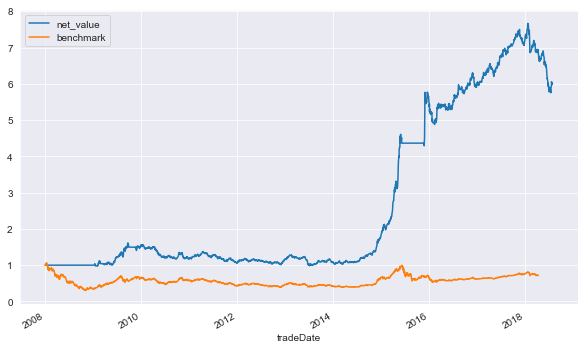

In [27]:
# 生成净值曲线
portfolio[['net_value', 'benchmark']].plot(figsize=(10,6))

## 3. 拓展思路

* 使用动态时间规整进行其他K线形态识别
* 使用不同周期的行情片段与模板片段进行比较
* 使用其他算法进行时间序列的比较
* 扩展时间序列中元素的维度，比如考虑高开低收四价数据或加入成交量数据